In [57]:

#Lung Cancer Prediction Using Clinical, Biochemical, and Genetic Data


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [17]:
#Load data set

df = pd.read_csv('lung cancer.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8796 entries, 0 to 8795
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   8796 non-null   int64  
 1   Age                          8796 non-null   int64  
 2   Gender                       8796 non-null   object 
 3   Smoking History              8796 non-null   object 
 4   Family History               8796 non-null   object 
 5   Treatment History            6567 non-null   object 
 6   ctDNA Concentration (ng/mL)  8796 non-null   float64
 7   Mutation Type                6614 non-null   object 
 8   Gene                         7043 non-null   object 
 9   Tumor Size (cm)              8796 non-null   float64
 10  Biopsy Result                8796 non-null   object 
 11  VOC1 Concentration (ppm)     8796 non-null   float64
 12  VOC2 Concentration (ppm)     8796 non-null   float64
 13  Lung Cancer       

In [21]:
df.describe()

,Patient ID,Age,ctDNA Concentration (ng/mL),Tumor Size (cm),VOC1 Concentration (ppm),VOC2 Concentration (ppm)
count,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000
mean,4398.500000,54.652001,0.993208,3.516405,0.273246,0.276061
std,2539.330817,14.430464,0.579690,1.447529,0.130722,0.130269
min,1.000000,30.000000,0.000000,1.000000,0.050000,0.050000
25%,2199.750000,42.000000,0.490000,2.300000,0.160000,0.160000
50%,4398.500000,55.000000,0.980000,3.500000,0.280000,0.280000
75%,6597.250000,67.000000,1.500000,4.800000,0.390000,0.390000
max,8796.000000,79.000000,2.000000,6.000000,0.500000,0.500000


In [23]:
df.head()

,Patient ID,Age,Gender,Smoking History,Family History,Treatment History,ctDNA Concentration (ng/mL),Mutation Type,Gene,Tumor Size (cm),Biopsy Result,VOC1 Concentration (ppm),VOC2 Concentration (ppm),Lung Cancer
0,1,53,Male,Yes,No,NaN,0.02,Deletion,NaN,2.5,Positive,0.17,0.22,Yes
1,2,66,Female,No,No,Radiotherapy,1.61,Insertion,KRAS,1.1,Positive,0.18,0.39,Yes
2,3,40,Female,No,No,NaN,1.36,Deletion,EGFR,4.7,Negative,0.26,0.31,Yes
3,4,43,Male,Yes,No,Chemotherapy,1.93,Insertion,NaN,1.7,Positive,0.26,0.29,Yes
4,5,44,Female,No,Yes,NaN,0.63,Deletion,EGFR,5.4,Negative,0.22,0.36,Yes


In [25]:
df.tail()

,Patient ID,Age,Gender,Smoking History,Family History,Treatment History,ctDNA Concentration (ng/mL),Mutation Type,Gene,Tumor Size (cm),Biopsy Result,VOC1 Concentration (ppm),VOC2 Concentration (ppm),Lung Cancer
8791,8792,55,Female,Yes,No,Surgery,0.74,NaN,EGFR,5.9,Negative,0.25,0.13,Yes
8792,8793,67,Male,No,No,Surgery,1.41,Deletion,TP53,4.6,Negative,0.26,0.26,Yes
8793,8794,40,Female,Yes,No,Surgery,1.61,Insertion,KRAS,3.1,Positive,0.25,0.21,Yes
8794,8795,52,Female,No,Yes,Chemotherapy,0.07,NaN,TP53,1.5,Positive,0.39,0.39,Yes
8795,8796,40,Male,No,No,Chemotherapy,0.83,Point Mutation,NaN,5.9,Positive,0.13,0.36,Yes


In [27]:
df.shape

(8796, 14)

In [29]:
#duplicates
df.duplicated().sum()

0

In [31]:
#checking missing values

print(df.isnull().sum())

Patient ID                        0
Age                               0
Gender                            0
Smoking History                   0
Family History                    0
Treatment History              2229
ctDNA Concentration (ng/mL)       0
Mutation Type                  2182
Gene                           1753
Tumor Size (cm)                   0
Biopsy Result                     0
VOC1 Concentration (ppm)          0
VOC2 Concentration (ppm)          0
Lung Cancer                       0
dtype: int64


Text(0.5, 1.0, 'Missing Data Heatmap')

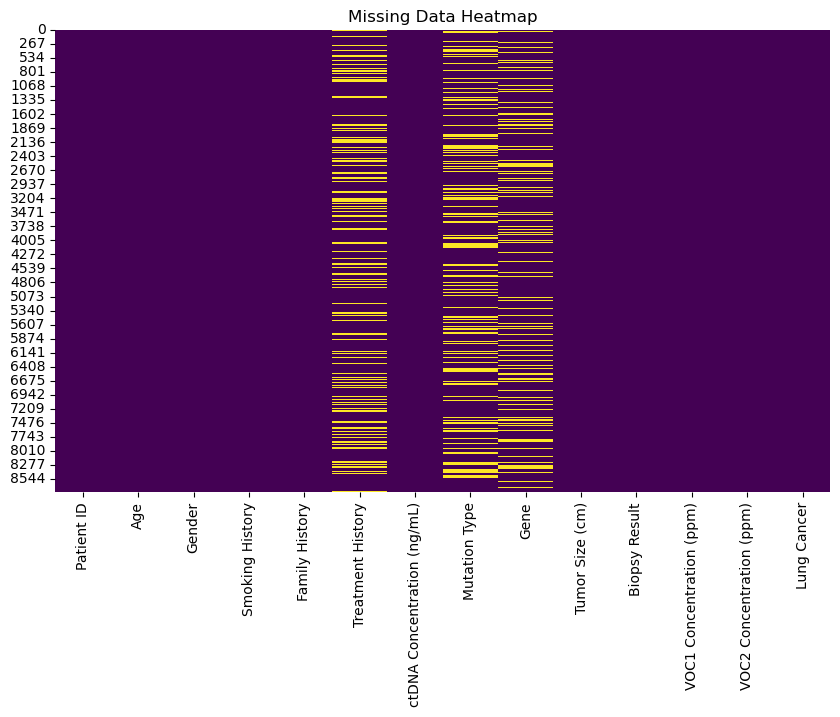

In [33]:
# Plot missing data as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')

In [35]:
# Replacing None with other values as per the data

# Impute missing values in the 'Treatment History' column with 'No Treatment'
df['Treatment History'] = df['Treatment History'].fillna('No Treatment')

# Impute missing values in the 'Mutation Type' column with 'None'
df['Mutation Type'] = df['Mutation Type'].fillna('None')

# Impute missing values in the 'Gene' column with 'No Genes Identified'
df['Gene'] = df['Gene'].fillna('No Genes Identified')

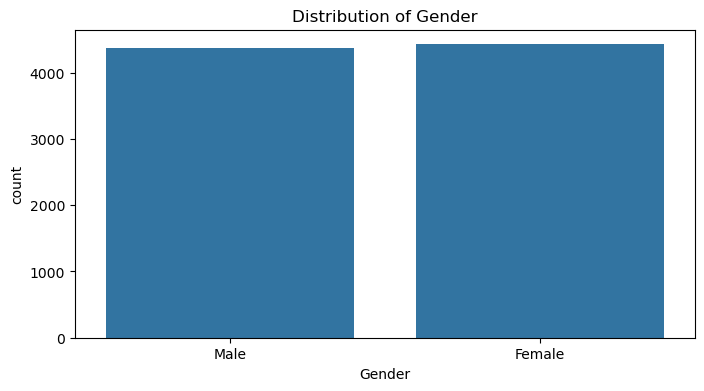

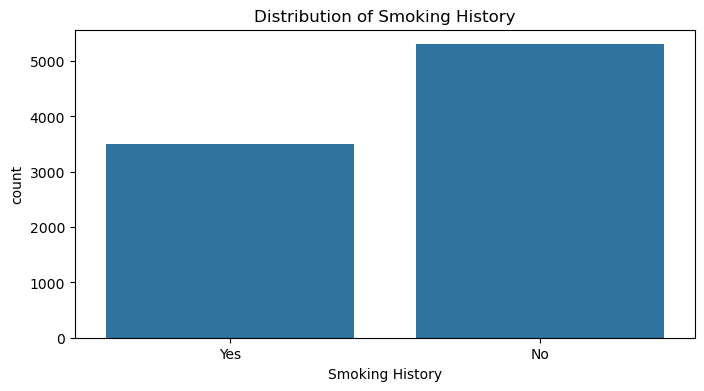

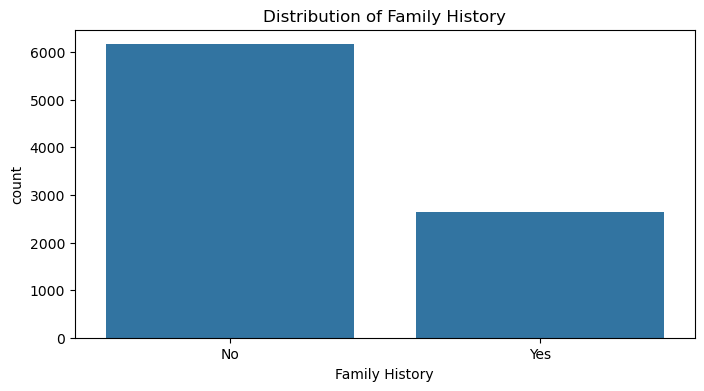

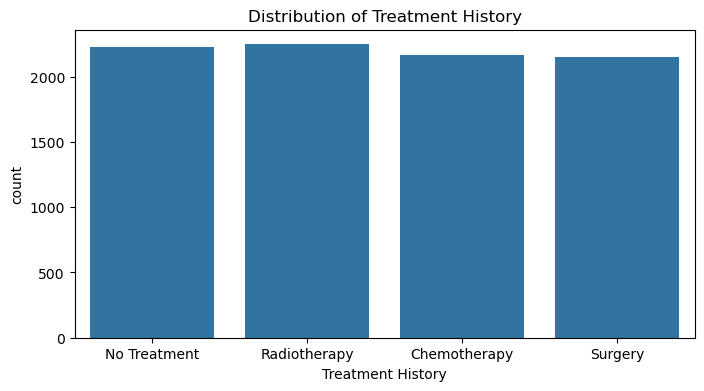

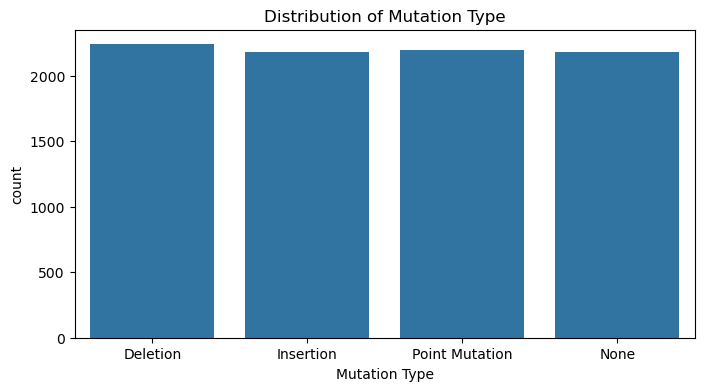

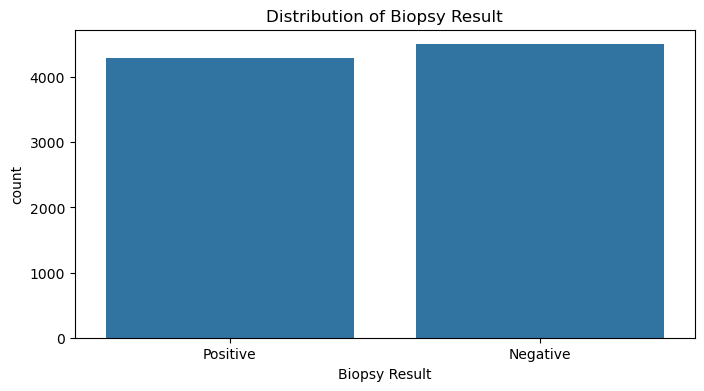

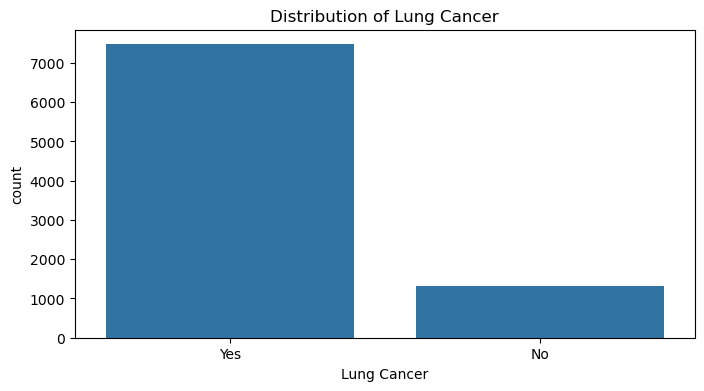

In [37]:
# List of categorical columns
categorical_columns = ['Gender', 'Smoking History', 'Family History', 'Treatment History', 'Mutation Type', 'Biopsy Result', 'Lung Cancer']

# Plot count plots for categorical features
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')

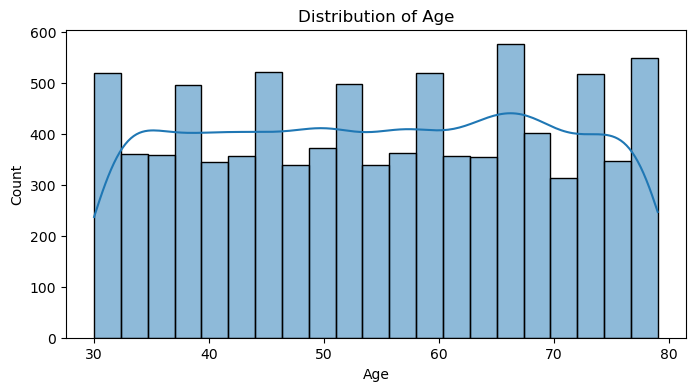

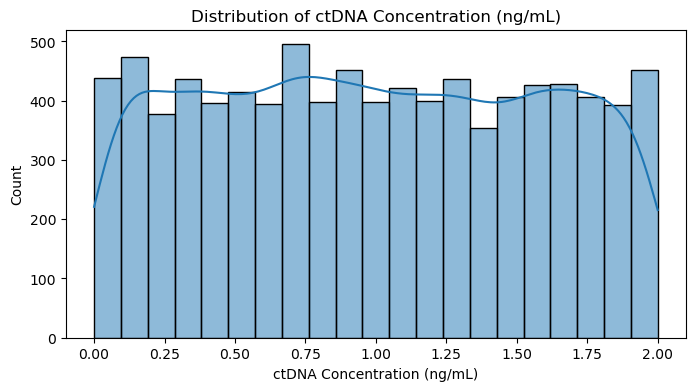

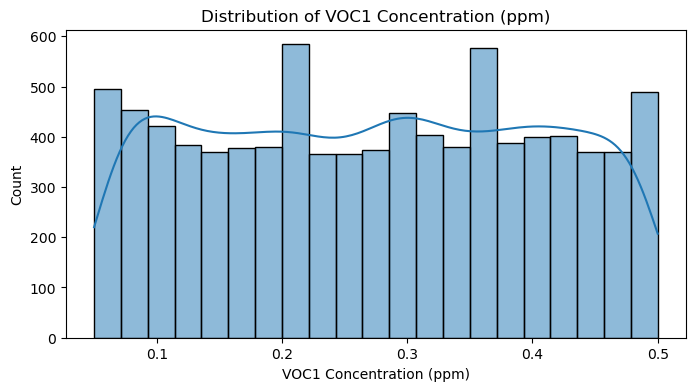

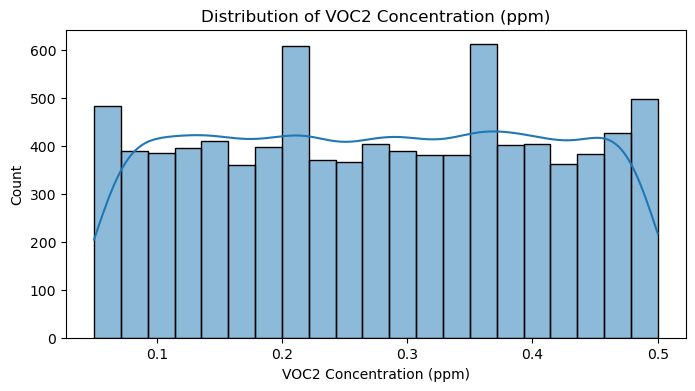

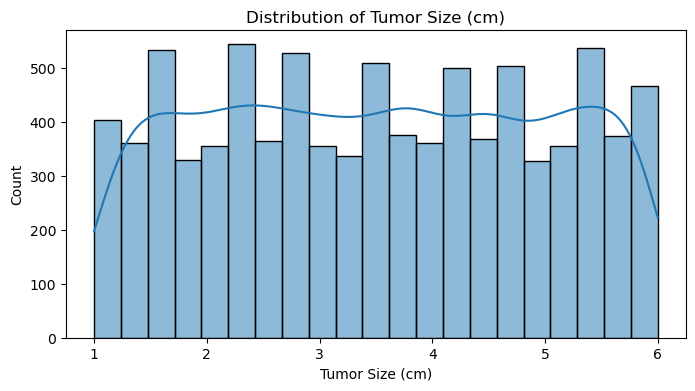

In [39]:
# List of numerical columns
numerical_columns = ['Age', 'ctDNA Concentration (ng/mL)', 'VOC1 Concentration (ppm)', 'VOC2 Concentration (ppm)', 'Tumor Size (cm)']

# Plot histograms for numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

In [43]:
#Correlation Analysis 

corr_matrix = df[numerical_columns].corr()
corr_matrix

,Age,ctDNA Concentration (ng/mL),VOC1 Concentration (ppm),VOC2 Concentration (ppm),Tumor Size (cm)
Age,1.000000,0.011794,0.011721,0.008850,-0.007123
ctDNA Concentration (ng/mL),0.011794,1.000000,-0.001285,-0.006546,-0.022021
VOC1 Concentration (ppm),0.011721,-0.001285,1.000000,0.003318,-0.011446
VOC2 Concentration (ppm),0.008850,-0.006546,0.003318,1.000000,-0.004257
Tumor Size (cm),-0.007123,-0.022021,-0.011446,-0.004257,1.000000


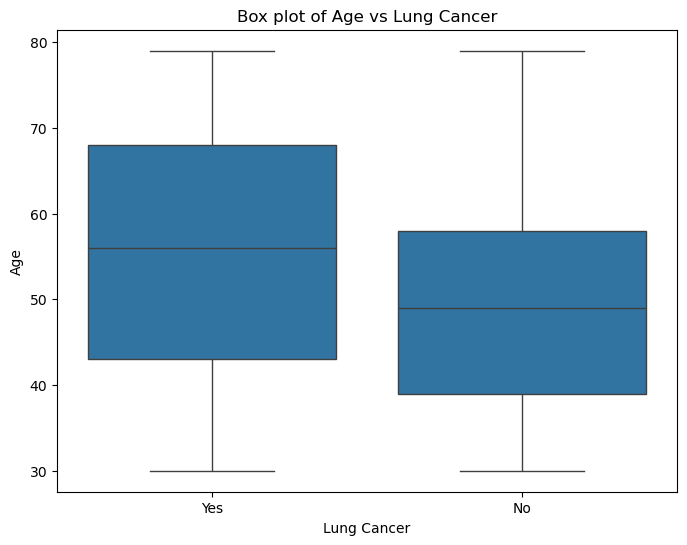

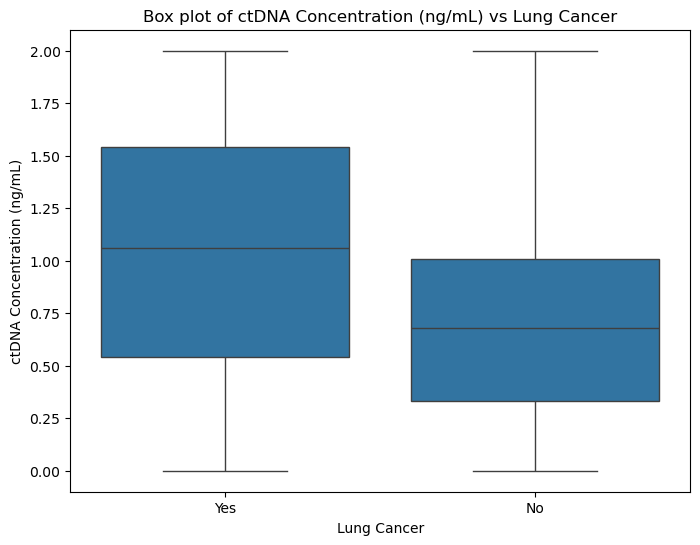

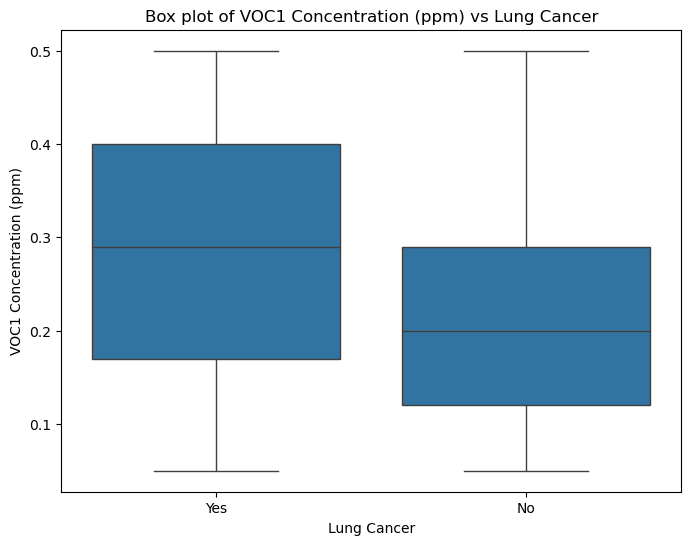

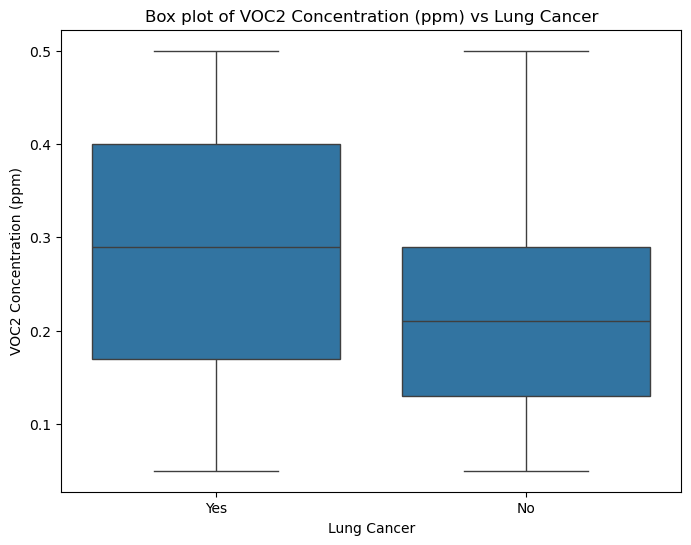

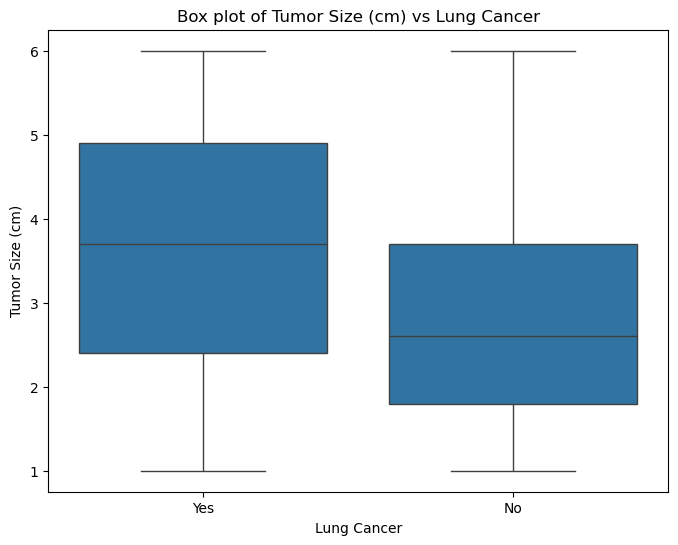

In [45]:
# List of numerical columns to plot
numerical_columns = ['Age', 'ctDNA Concentration (ng/mL)', 'VOC1 Concentration (ppm)', 
                     'VOC2 Concentration (ppm)', 'Tumor Size (cm)']

# Plotting boxplots for each numerical column with respect to 'Lung Cancer' (target variable)
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Lung Cancer', y=col, data=df)
    plt.title(f'Box plot of {col} vs Lung Cancer')
    plt.show()

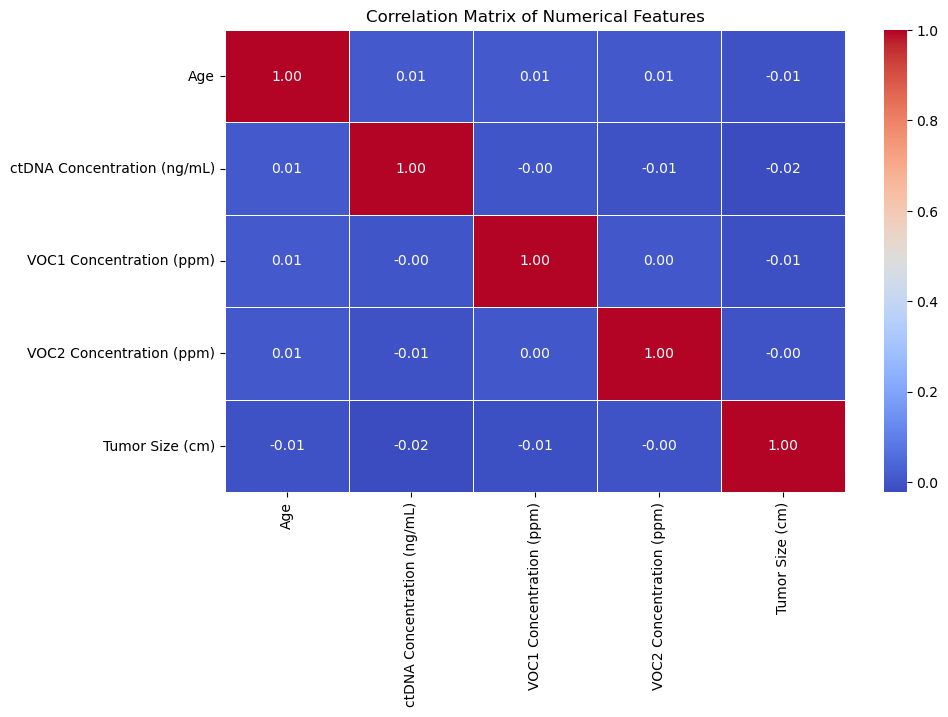

In [47]:
# Plot the heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

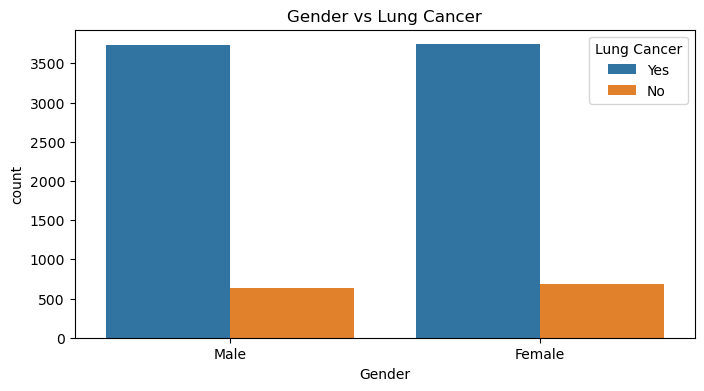

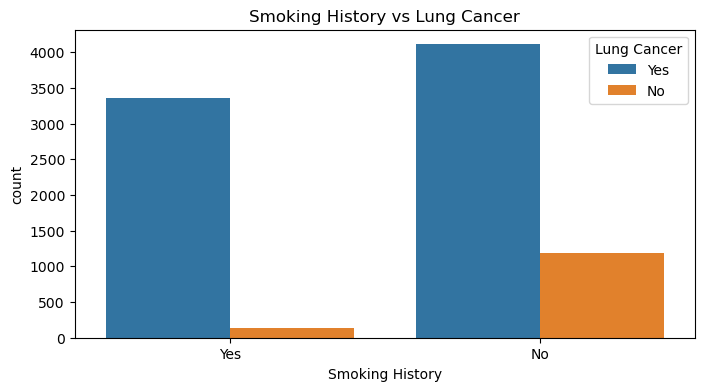

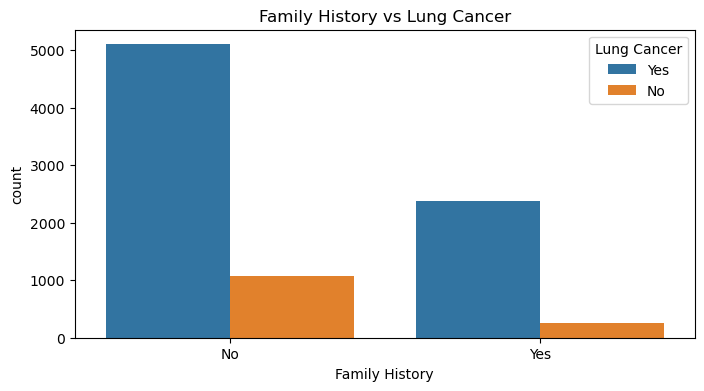

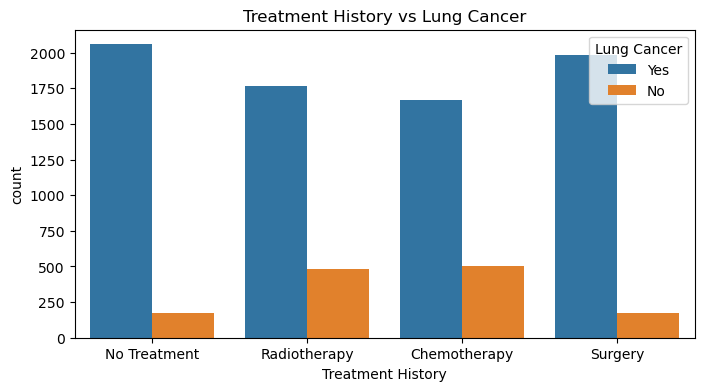

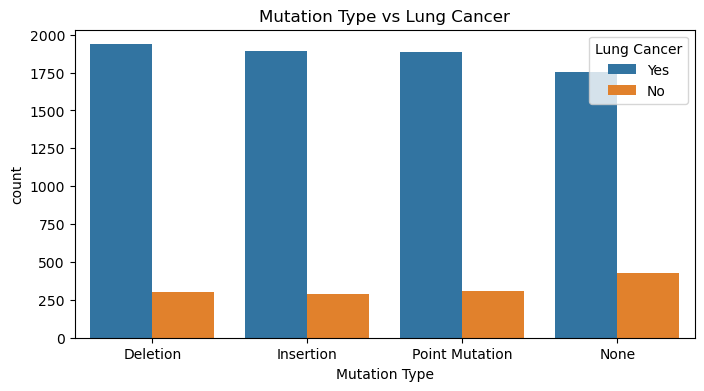

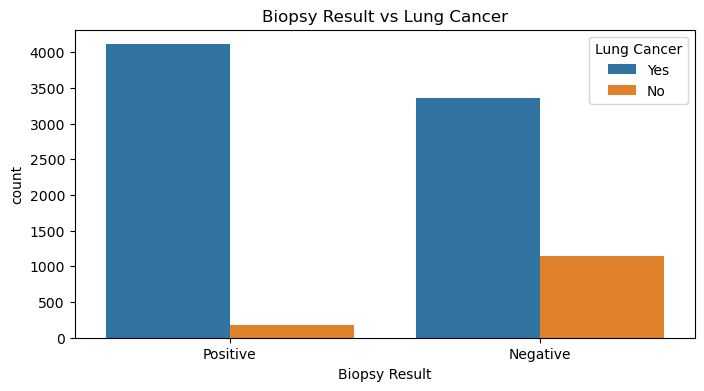

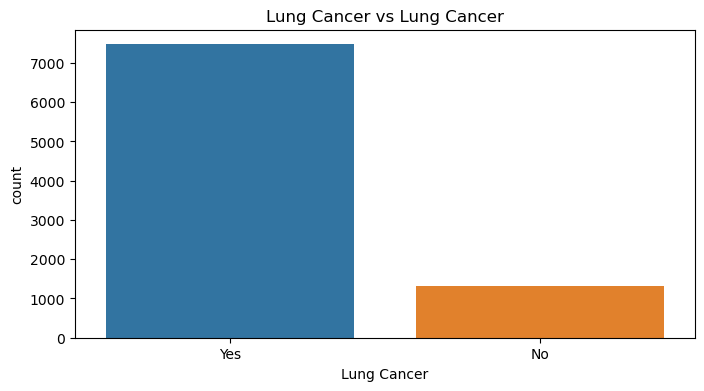

In [49]:
#Relationships Between Features and Target Variable

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Lung Cancer', data=df)
    plt.title(f'{col} vs Lung Cancer')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'No Genes Identified'),
  Text(1, 0, 'KRAS'),
  Text(2, 0, 'EGFR'),
  Text(3, 0, 'ALK'),
  Text(4, 0, 'TP53')])

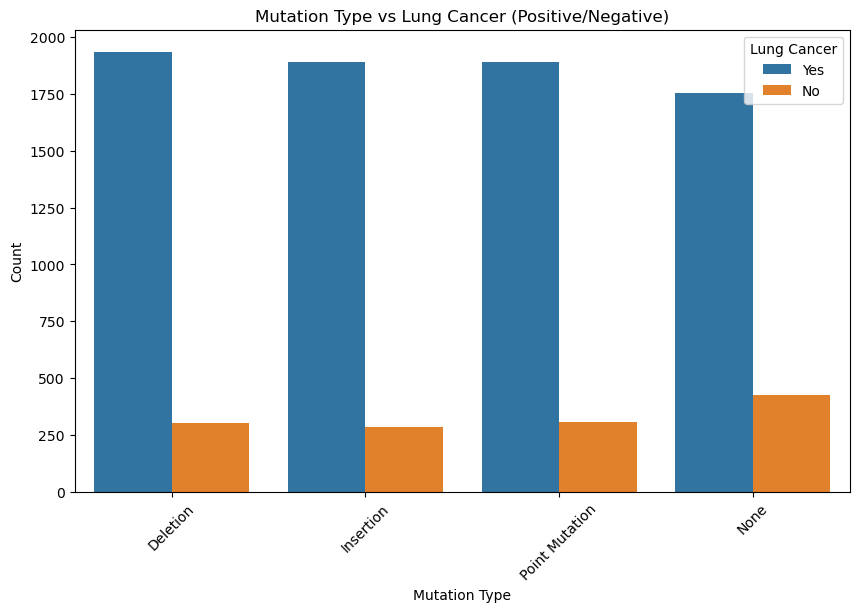

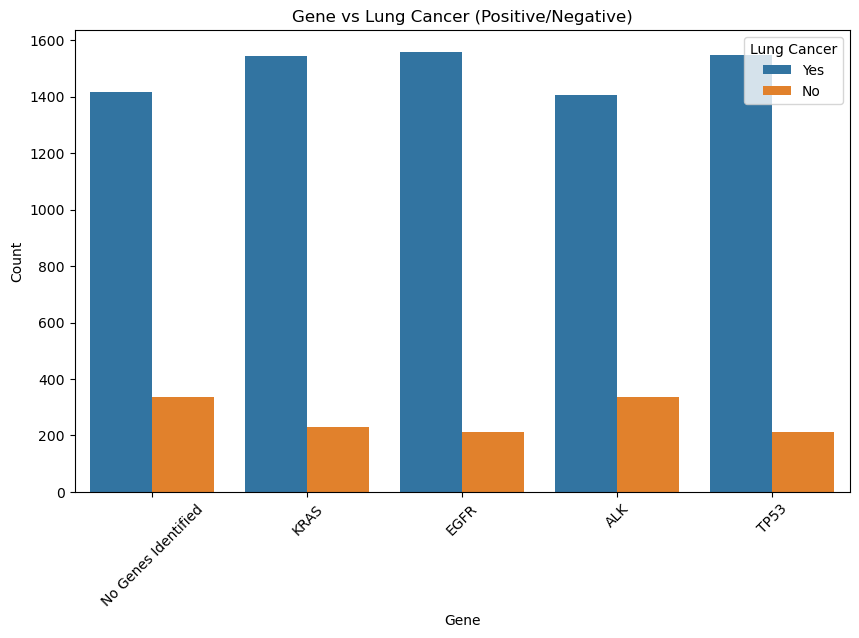

In [53]:
# Count plot of Mutation Type vs Lung Cancer
plt.figure(figsize=(10, 6))
sns.countplot(x='Mutation Type', hue='Lung Cancer', data=df)
plt.title('Mutation Type vs Lung Cancer (Positive/Negative)')
plt.xlabel('Mutation Type')
plt.ylabel('Count')
plt.xticks(rotation=45)


# Count plot of Gene vs Lung Cancer
plt.figure(figsize=(10, 6))
sns.countplot(x='Gene', hue='Lung Cancer', data=df)
plt.title('Gene vs Lung Cancer (Positive/Negative)')
plt.xlabel('Gene')
plt.ylabel('Count')
plt.xticks(rotation=45)

In [55]:
# counts of different mutation types for each gene

# Group by 'Gene' and 'Mutation Type' to count occurrences of each mutation type
mutation_counts = df.groupby(['Gene', 'Mutation Type']).size().reset_index(name='Count')

mutation_counts

,Gene,Mutation Type,Count
0,ALK,Deletion,432
1,ALK,Insertion,427
2,ALK,None,427
3,ALK,Point Mutation,453
4,EGFR,Deletion,442
5,EGFR,Insertion,441
6,EGFR,None,469
7,EGFR,Point Mutation,417
8,KRAS,Deletion,493
9,KRAS,Insertion,413


In [57]:
# pivot table - the counts of mutation types for each gene
mutation_pivot = mutation_counts.pivot_table(index='Gene', columns='Mutation Type', values='Count', fill_value=0)
mutation_pivot

Mutation Type,Deletion,Insertion,None,Point Mutation
Gene,,,,
ALK,432.0,427.0,427.0,453.0
EGFR,442.0,441.0,469.0,417.0
KRAS,493.0,413.0,433.0,436.0
No Genes Identified,451.0,443.0,408.0,451.0
TP53,420.0,455.0,445.0,440.0


In [59]:
# One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['Gender', 'Smoking History', 'Family History', 
                                          'Treatment History', 'Mutation Type', 
                                          'Biopsy Result', 'Gene','Lung Cancer'], drop_first=False)
df_encoded.head()

,Patient ID,Age,ctDNA Concentration (ng/mL),Tumor Size (cm),VOC1 Concentration (ppm),VOC2 Concentration (ppm),Gender_Female,Gender_Male,Smoking History_No,Smoking History_Yes,...,Mutation Type_Point Mutation,Biopsy Result_Negative,Biopsy Result_Positive,Gene_ALK,Gene_EGFR,Gene_KRAS,Gene_No Genes Identified,Gene_TP53,Lung Cancer_No,Lung Cancer_Yes
0,1,53,0.02,2.5,0.17,0.22,False,True,False,True,...,False,False,True,False,False,False,True,False,False,True
1,2,66,1.61,1.1,0.18,0.39,True,False,True,False,...,False,False,True,False,False,True,False,False,False,True
2,3,40,1.36,4.7,0.26,0.31,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True
3,4,43,1.93,1.7,0.26,0.29,False,True,False,True,...,False,False,True,False,False,False,True,False,False,True
4,5,44,0.63,5.4,0.22,0.36,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True


In [61]:
#split the data into training and testing sets

# Defining the feature matrix X and target vector y
X = df_encoded.drop(['Lung Cancer_Yes', 'Patient ID'], axis=1)  # Dropping target and ID columns
y = df_encoded['Lung Cancer_Yes']  # Target column for Lung Cancer (Positive or Negative)

# Spliting the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7036, 27) (1760, 27) (7036,) (1760,)


In [63]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Checking the scaled data
print(X_train_scaled[:5])

[[ 0.71853346 -0.18865428 -1.25483555  1.57218983  1.02032045  0.99320105
  -0.99320105  0.80580407 -0.80580407 -1.52329714  1.52329714 -0.57341151
   1.71001446 -0.58347733 -0.56772162 -0.58435269 -0.56969131 -0.57450562
   1.72161078  0.9761235  -0.9761235  -0.49261591 -0.50284093 -0.50128769
  -0.49840056  1.98083893 -0.41764615]
 [-0.7331529   0.53786692  0.1881184  -0.48960809 -0.59172476  0.99320105
  -0.99320105 -1.24099646  1.24099646  0.65647074 -0.65647074 -0.57341151
   1.71001446 -0.58347733 -0.56772162 -0.58435269  1.75533658 -0.57450562
  -0.58085138 -1.02446053  1.02446053  2.0299791  -0.50284093 -0.50128769
  -0.49840056 -0.5048366  -0.41764615]
 [-1.70094381 -1.52060982 -1.52968392  1.64855271  0.0223877   0.99320105
  -0.99320105  0.80580407 -0.80580407 -1.52329714  1.52329714 -0.57341151
  -0.58479037 -0.58347733  1.76142667 -0.58435269  1.75533658 -0.57450562
  -0.58085138  0.9761235  -0.9761235   2.0299791  -0.50284093 -0.50128769
  -0.49840056 -0.5048366   2.39437

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [73]:
#### Logistic Regression model

log_reg = LogisticRegression(random_state = 42)
log_reg

LogisticRegression(random_state=42)

In [79]:
#Fitting model on trained data

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [85]:
# Predictions
y_pred_logreg = log_reg.predict(X_test_scaled)
y_pred_logreg

array([ True,  True,  True, ..., False,  True,  True])

In [91]:
# Making predictions on the test data
y_pred = log_reg.predict(X_test_scaled)
y_pred

array([ True,  True,  True, ..., False,  True,  True])

In [93]:
# Probability scores for ROC curve (probability of class 1)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
y_prob

array([0.99973677, 0.99991087, 0.99943859, ..., 0.00111371, 0.99962899,
       0.99964817])

In [97]:
#### Support Vector Machine (SVM

svm = SVC(kernel='linear', probability=True, random_state=42)
svm

SVC(kernel='linear', probability=True, random_state=42)

In [99]:
#Fitting model on trained data

svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [105]:
# Predictions
y_pred_svm = svm.predict(X_test_scaled)
y_pred_svm

array([ True,  True,  True, ..., False,  True,  True])

In [111]:
# Making predictions on the test data
y_pred_svm = svm.predict(X_test_scaled)
y_pred_svm

array([ True,  True,  True, ..., False,  True,  True])

In [113]:
# Probability scores for ROC curve (probability of class 1)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]
y_prob_svm

array([9.99999917e-01, 9.99999918e-01, 9.99999916e-01, ...,
       9.53113587e-04, 9.99999917e-01, 9.99999917e-01])

In [115]:
#### Decision Tree Classifier

dtree = DecisionTreeClassifier(random_state=42)
dtree

DecisionTreeClassifier(random_state=42)

In [117]:
#Fitting model on trained data

dtree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [121]:
# Predictions
y_pred_dtree = dtree.predict(X_test_scaled)
y_pred_dtree

array([ True,  True,  True, ..., False,  True,  True])

In [123]:
# Making predictions on the test data
y_pred_dtree = dtree.predict(X_test_scaled)
y_pred_dtree

array([ True,  True,  True, ..., False,  True,  True])

In [125]:
# Probability scores for ROC curve (probability of class 1)
y_prob_dtree = dtree.predict_proba(X_test_scaled)[:, 1]
y_prob_dtree

array([1., 1., 1., ..., 0., 1., 1.])

In [131]:
#### Multi-layer Perceptron Classifier (MLP

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp

MLPClassifier(max_iter=500, random_state=42)

In [135]:
#Fitting model on trained data

mlp.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [137]:
# Predictions
y_pred_mlp = mlp.predict(X_test_scaled)
y_pred_mlp

array([ True,  True,  True, ..., False,  True,  True])

In [139]:
# Making predictions on the test data
y_pred_mlp = mlp.predict(X_test_scaled)
y_pred_mlp

array([ True,  True,  True, ..., False,  True,  True])

In [141]:
# Probability scores for ROC curve (probability of class 1)
y_prob_mlp = mlp.predict_proba(X_test_scaled)[:, 1]
y_prob_mlp

array([9.99839182e-01, 9.99627503e-01, 9.99301870e-01, ...,
       3.49499049e-04, 9.99791811e-01, 9.99637391e-01])

In [145]:
#### Naive Bayes Classifier

nb = GaussianNB()
nb

GaussianNB()

In [147]:
#Fitting model on trained data

nb.fit(X_train_scaled, y_train)

GaussianNB()

In [151]:
# Predictions
y_pred_nb = nb.predict(X_test_scaled)
y_pred_nb

array([ True,  True,  True, ..., False,  True,  True])

In [153]:
# Making predictions on the test data
y_pred_nb = nb.predict(X_test_scaled)
y_pred_nb

array([ True,  True,  True, ..., False,  True,  True])

In [155]:
# Probability scores for ROC curve (probability of class 1)
y_prob_nb = nb.predict_proba(X_test_scaled)[:, 1]
y_prob_nb

array([1., 1., 1., ..., 0., 1., 1.])

In [157]:
#### Random Forest Classifier

rf = RandomForestClassifier(random_state=42)
rf

RandomForestClassifier(random_state=42)

In [159]:
#Fitting model on trained data

rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [163]:
# Predictions
y_pred_rf = rf.predict(X_test_scaled)
y_pred_rf

array([ True,  True,  True, ..., False,  True,  True])

In [165]:
# Making predictions on the test data
y_pred_rf = rf.predict(X_test_scaled)
y_pred_rf

array([ True,  True,  True, ..., False,  True,  True])

In [167]:
# Probability scores for ROC curve (probability of class 1)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
y_prob_rf

array([1.  , 1.  , 0.99, ..., 0.01, 1.  , 0.99])

In [169]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc